# CS166 Final Project - Emergency Response Simulation.

In [1]:
#importing the needed libraries:
from matplotlib import pyplot as plt
import networkx as nx
import random
import numpy as np
import scipy
from scipy import stats
import math
import copy
from networkx.algorithms.shortest_paths.weighted import dijkstra_path
from networkx.algorithms.shortest_paths.weighted import dijkstra_path_length
from scipy import stats
from copy import deepcopy
from matplotlib.cbook import flatten
import seaborn as sns

### I start by turning the map of Central London provided in the assignment instructions into a network graph

In [2]:
# I added an edge between every two neighborhood that had borders in the map, the edges will have a weight of 5 or 7 depending
# on whether they are big cities or not

neighborhoods_connections = [ ("ST.John's Wood", 'Paddington'), ("ST.John's Wood", "Primrose Hill"), 
                      ("Primrose Hill", "Regent's Park"),
                       ("Primrose Hill", "Camden Town"), ("Camden Town", "Regent's Park"),  ("Camden Town", "Islington"), 
                       ("Camden Town", "Bloomsbury"), ("Regent's Park", "Marylebone"), ("Regent's Park", "Fitzrovia"), 
                       ("Islington", "Bloomsbury"), ("Islington", "Clerkenwell"), ("Islington", "Hoxton"), 
                       ("Hoxton", "Clerkenwell"),("Nottinghill", "Paddington"),("Nottinghill", "Bayswater"), 
                       ("Nottinghill", "Marylebone"), ("Bayswater", "Kensington"), ("Bayswater", "Marylebone"), 
                       ("Bayswater", "Hyde Park"), ("Kensington", "Knights Bridge"), ("Kensington", "Hyde Park"),  
                       ("Knights Bridge", "Hyde Park"), ("Knights Bridge", "Brompton"), ("Knights Bridge", "Belgravia"), 
                       ("Brompton", "Chelsea"), ("Brompton", "Belgravia"),  ("Chelsea", "Belgravia"), ("Chelsea", "Pimlico"), 
                       ("Pimlico", "Belgravia"), ("Pimlico", "West minster"), ("Pimlico", "St.Jame's"), ("Belgravia", "St.Jame's"), 
                       ("Belgravia", "Mayfair"), ("Hyde Park", "Mayfair"), ("Hyde Park", "St.Jame's"), ("Marylebone", "Fitzrovia"), 
                       ("Marylebone", "Mayfair"), ("Marylebone", "Soho"), ("Mayfair", "St.Jame's"), ("Mayfair", "Soho"), 
                       ("St.Jame's", "Covent Garden"), ("St.Jame's", "West minster"), ("West minster", "Lambeth"), 
                       ("West minster", "Covent Garden"), ("Lambeth", "South Bank"), ("Lambeth", "Wandsworth"), 
                       ("Lambeth", "London Bridge"), ("Lambeth", "Kennington"),
                       ("South Bank", "London Bridge"), ("South Bank", "Covent Garden"), 
                       ("South Bank", "Holborn"), ("South Bank", "The City"), ("South Bank", "Wandsworth"),
                       ("Covent Garden", "Fitzrovia"), ("Covent Garden", "Holborn"), ("Covent Garden", "Bloomsbury"), 
                       ("Soho", "Bloomsbury"), ("Soho", "Fitzrovia"),("Fitzrovia", "Bloomsbury"), ("Bloomsbury", "Holborn"), 
                       ("Bloomsbury", "Clerkenwell"), ("Bloomsbury", "Barbican"), ("Bloomsbury", "The City"), 
                       ("Holborn", "The City"), ("Holborn", "Barbican"), ("London Bridge", "The City"), 
                       ("London Bridge", "Bermondsey"), ("London Bridge", "Wandsworth"), ("Wandsworth", "Kennington"), 
                       ("Wandsworth", "Bermondsey"), ("Kennington", "Lambeth"), ("Kennington", "Bermondsey"), 
                       ("The City", "Spitalfields"), ("The City", "Barbican"), ("Spitalfields", "Barbican"),
                       ("Spitalfields", "Clerkenwell"),  ("Barbican", "Clerkenwell"), ("Clerkenwell", "Hoxton"), 
                       ("Clerkenwell", "Islington") ]

# I modeled the highway as nodes that connect the neighborhood that are along the highway.
# Each edge between the two nodes of the highway (named "H") will represent a segment of the highway
# the weight of the segment (or the average time it takes to cross it) is 1

highway_connections = [("H1", "West minster"), ("H1", "Pimlico"),("H1", "H2"),("H2", "St.Jame's"),
                 ("H2", "Belgravia"),("H2", "H3"), ("H3", "Belgravia"), ("H3", "Knights Bridge"),
                 ("H3", "H4"), ("H4", "Hyde Park"), ("H4","Mayfair"),("H4", "H5"), ("H5","Marylebone" ), 
                 ("H5", "Bayswater"), ("H5", "Nottinghill"), ("H5", "H6"),("H6", "Paddington"), 
                 ("H6", "Nottinghill"),("H6", "H7") ,("H7", "Marylebone"), ("H7", "ST.John's Wood"), 
                 ("H7", "H8"),("H8", "Regent's Park"), ("H8", "Fitzrovia"), ("H8", "H9"),("H9", "Bloomsbury"), 
                 ("H9", "Camden Town"), ("H9", "H10"),("H10", "Islington"), ("H10", "Clerkenwell"), 
                 ("H10", "H11"),("H11", "Clerkenwell"), ("H11", "Hoxton"), ("H11", "H12"),("H12", "Spitalfields"), 
                 ("H12", "H13"),("H13", "The City"),("H13", "H14"), ("H14", "London Bridge"), ("H14", "Bermondsey"), 
                 ("H14", "H15"),("H15", "London Bridge"), ("H15", "Wandsworth"), ("H15", "H16"),("H16","Lambeth"), 
                 ("H16","Kennington"),("H16", "H17"),("H17", "H1")]

# all the neighborhoods names from the map:
neighborhoods_names =["ST.John's Wood"
,"Primrose Hill"
,"Regent's Park"
,"Camden Town"
,"Islington"
,"Hoxton"
,"Nottinghill"
,"Bayswater"
,"Kensington"
,"Knights Bridge"
,"Brompton"
,"Chelsea"
,"Pimlico"
,"Belgravia"
,"Hyde Park"
,"Marylebone"
,"Mayfair"
,"St.Jame's"
,"West minster"
,"Lambeth"
,"South Bank"
,"Covent Garden"
,"Soho"
,"Fitzrovia"
,"Bloomsbury"
,"Holborn"
,"London Bridge"
,"Wandsworth"
,"Kennington"
,"Bermondsey"
,"The City"
,"Spitalfields"
,"Barbican"
,"Clerkenwell", 
"Paddington"]

# Now, I divided the map into five different regions:

central_regions = ["Marylebone", "Fitzrovia", "Bloomsbury", "Mayfair", "Soho", "Covent Garden", "St.Jame's", "Holborn"]
north_west = ["ST.John's Wood", "Primrose Hill", "Paddington", "Nottinghill","Bayswater", "Regent's Park" ]
north_east = ["Camden Town", "Islington","Hoxton", "Clerkenwell", "Barbican", "Spitalfields", "The City"]
south_east = ["Lambeth", "West minster", "South Bank", "London Bridge","Wandsworth", "Bermondsey", "Kennington"]
south_west = ["Chelsea", "Brompton", "Pimlico", "Belgravia", "Hyde Park", "Kensington","Knights Bridge"]
london_regions = [central_regions,north_west, north_east, south_east, south_west ]


london_regions_names = ["Central Regions","North West", "North East", "South East", "South West" ]

london_regions_dict = {"Central Regions":central_regions ,"North West":north_west, "North East":north_east,
                       "South East": south_east, "South West":south_west }



# The dangerous neighborhoods according to Google:
dangerous_neighborhoods = ["St.Jame's", "Lambeth", "Camden Town", "The City"]
# The big neighborhoods according to Google:
big_neighborhoods = ["The City", "Regent's Park", "London Bridge", "Covent Garden", "Clerkenwell"]

In [3]:
south_west = ["Chelsea", "Brompton", "Pimlico", "Belgravia", "Hyde Park", "Kensington","Knights Bridge"]
dangerous_neighborhoods = ["St.Jame's", "Lambeth", "Camden Town", "The City"]
big_neighborhoods = ["The City", "Regent's Park", "London Bridge", "Covent Garden", "Clerkenwell"]

### Now, I will use the edges and nodes above to build the simulation

In [4]:
verbose = False # If this is true, it will print the update statements

over_regions_average = False # If this is true, it will do some extra steps explained below


class patient:
    '''
    This is a class for the patients that call the ambulances. it will contain the location and the calling 
    time of the patient, these information will be used for the analysis.
    '''
    def __init__(self, current_time, name, location):
        self.name  = "Case "+str(name) 
        self.location = location
        self.status = 'waiting'
        self.calling_time = current_time
        self.time_waited = np.inf # the time that patients wait, it will be updated once patients get delivered

                
class simulation:
    '''
    That's the main simulation class that will be used to simulate the city.
    The class depends heavily on the two classes defined (patient and ambulances) because they represent 
    the two main elements of the city.
    '''
    def __init__(self, depots_number):
        self.depots_number = depots_number # number of amulances stations
        
        # initializing the graph using the neighborhood names that I wrote above
        self.london_graph = nx.Graph()
        self.london_graph.add_edges_from(neighborhoods_connections)
        self.london_graph.add_edges_from(highway_connections)
        for edge in self.london_graph.edges():
            i, j = edge
            if i in big_neighborhoods or j in big_neighborhoods:
                self.london_graph.edges[i, j]['Time'] = 7
            elif i[0] == "H" and j[0] == "H":
                self.london_graph.edges[i, j]['Time'] = 1
            else:
                self.london_graph.edges[i, j]['Time'] = 5

        self.layout = nx.spring_layout(self.london_graph)
        
        
        self.waiting_times_analysis_depot = [] #average waiting times for allocating the depots
        self.analysis_order_depot = [] # the different combinations
        self.waiting_times_analysis_ambulance = [] # average waiting times for allocating the ambulances
        self.analysis_order_ambulance = [] # the different combinations
        
        # this will store the average waiting time for each region.
        self.local_regions_averages = {"Central Regions":[] ,"North West":[], 
                                  "North East":[], "South East": [], "South West":[]}
        
        self.global_regions_averages = [] 
        self.waiting_cases_num_depot = [] # total number of cases
        self.delivered_cases_depot = [] # number of delivered cases
        simulation.delivered_cases_num = 0
        

    
    def show_graph(self):
        '''
        A function to show the graph
        '''
        plt.figure(figsize= (12, 10))
        nx.draw(self.london_graph, with_labels=True, pos = self.layout, node_size = 2000, nodelist=neighborhoods_names)
        plt.show()
        
    def depot_simulation(self, london_regions = london_regions): 
        '''
        This function will do the simulation to find the optimal allocation of the number of depots
        to each region.
        '''
        regions_len = len(london_regions) # how many regions (always 5)
        all_combinations = [] # this will store all the possible combinations of allocating N depots over 5 regions
        
        # this determines the number of possible combinations:
        possible_combinations = scipy.special.comb(self.depots_number+regions_len-1,regions_len-1) 
        
        # get the number of combinations from the multinomial distribution
        while len(all_combinations) != possible_combinations: 
            allocation = list(np.random.multinomial(self.depots_number, np.ones(regions_len)/regions_len))
            if allocation not in all_combinations:
                all_combinations.append(allocation)
        
        
        loop_counter = 0
        for one_combination in all_combinations: #for each combination, build a dict with that combination
            depots_dict = {} # the dict will be like: {region: [number of depots, 1]} the 1 is for one ambulance
            for i, numb in enumerate(one_combination):
                if numb > 0:
                    depots_dict[london_regions_names[i]] = [numb, 1]
            
            loop_counter+=1
            if not verbose:
                print(f"working on {loop_counter} out of the {len(all_combinations)} combinations")
                
                
            #for each combination, run many times and store the average:
            regions_averager = {"Central Regions":[] ,"North West":[], 
                                  "North East":[], "South East": [], "South West":[] }    
            averager = [] 
            active_cases_averager = []
            delivered_cases_averager = []
            for i in range(40): #this will store 40 averages for each combination
                self.start_city(depots_dict) # start the simulation of the city with each combination
                averager.append(np.mean(self.all_waiting_times))
                active_cases_averager.append(self.waiting_cases_num)
                delivered_cases_averager.append(self.delivered_cases_list)
                
                if over_regions_average: #if true, get averages for each regions separately
                    for key in regions_averager.keys():
                        regions_averager[key].append(np.mean(self.local_regions_averages[key]))
                
                if verbose: #when verbose is True then we just want to see the update statements for one combination
                    break
                    
            # Appending the averages obtained for one combination:
            self.waiting_times_analysis_depot.append(averager)
            self.analysis_order_depot.append(depots_dict)
            self.waiting_cases_num_depot.append(list(np.mean(active_cases_averager, axis=0)))
            self.delivered_cases_depot.append(list(np.mean(delivered_cases_averager, axis=0)))
            
            if over_regions_average:
                self.global_regions_averages.append(regions_averager)
            
            
            if verbose:
                break
        print("Done!")    
            
            
    def ambulance_simulation(self, regions_dict, ambulances_number):
        '''
        A very similar function as the above one but for doing simulation to get the optimal number of ambulances
        Inputs:
        regions_dict: this is a dictionary that indicates the optimal combination of depots, it's taking from the above 
        function.
        ambulance_number: the number of ambulances that we have and want to distribute.
        '''
                
        depots_len = len(regions_dict.keys()) # Number of depots
        ambulances_number -= depots_len #subtracting the number of ambul from depots so that each depot can have 
        #at least one ambulance and the remaining will be used to make the different combinations.
        
        
        all_combinations_ambul = [] # all possible ambulances combinations
        # get all possible combinations, similar to the above function
        possible_combinations = scipy.special.comb(ambulances_number+depots_len-1,depots_len-1) 
        while len(all_combinations_ambul) != possible_combinations:
            allocation = list(np.random.multinomial(ambulances_number, np.ones(depots_len)/depots_len))
            if allocation not in all_combinations_ambul:
                all_combinations_ambul.append(allocation)
        
        loop_counter = 0    
        #similar to depot simulation, for each combination run sumulation
        for combination in all_combinations_ambul:
            # adding the number of ambulances from the combination:
            for i, key in enumerate(regions_dict.keys()):
                regions_dict[key][-1] = 1+combination[i] # add one because each region should have at least 1
            
                        
            loop_counter+=1
            if not verbose:
                print(f"working on {loop_counter} out of the {len(all_combinations_ambul)} combinations")
            averager = []
            active_cases_averager = []
            delivered_cases_averager = []
            
            for i in range(40): #run each combination for 40 times and each time for 100,000 steps
                self.start_city(regions_dict)
                averager.append(np.mean(self.all_waiting_times))
                active_cases_averager.append(self.waiting_cases_num)
                delivered_cases_averager.append(self.delivered_cases_list)
                if verbose:
                    break    
            # saving the averages for each combination
            self.waiting_times_analysis_ambulance.append(averager)
            self.analysis_order_ambulance.append(deepcopy(regions_dict))
            self.waiting_cases_num_depot.append(list(np.mean(active_cases_averager, axis=0)))
            self.delivered_cases_depot.append(list(np.mean(delivered_cases_averager, axis=0)))
            if verbose:
                break
        print("Done!")    




    def start_city(self, _dict):
        '''
        This function us the main simulation function. It starts the city and runs it for 100,000 steps using
        inputs configurations from the all the functions above.
        _dict: is a dictionary that tells how many depots and how many ambulances for which regions
        '''
        
        city_depots ={} # Since we are given the regions, we choose cities from this regions randomly
        
        for region in _dict.keys():
            region_cities = random.sample(london_regions_dict[region], _dict[region][0])
            n=len(region_cities)
            if _dict[region][-1] > 1: # If one region takes more than one number, then get ambulances number from multin
                ambulances = list(np.random.multinomial(_dict[region][-1], np.ones(n)/n))
            else:
                ambulances = [1]*n # this is for the depots simulation where the number of ambulances is awlays 1
            d = dict(zip(region_cities, ambulances)) #maing a dictionary of cities and number of ambul they have
            city_depots = dict(city_depots, **d)
        if verbose:
            print(f"Neighborhoods with ambulances: {city_depots} \n")
        
        #for each depot I replace the number of ambulances with a number of amublances objects using the class ambulance
        for key in city_depots.keys():
            city_depots[key] = [ambulance(key) for i in range(city_depots[key])]
        
        city_ambulances = list(flatten(city_depots.values())) # all ambulances we have
        available_ambulances = deepcopy(city_ambulances) # the avaiable ones. Taking a deepcopy to make sure not to change
        # the all ambulances dictionary
        busy_ambulances = [] # the busy ones
        emergency_cases = [] # adding all emergency cases
        self.all_waiting_times = [] # All waiting times
        self.cases_number=0 # total number of cases
        simulation.delivered_cases_num = 0 # number delievered already
        self.delivered_cases_list = [] # list to save delivered number over time.
        self.waiting_cases_num = [] #list to save all cases over time
        
        self.local_regions_averages = {"Central Regions":[] ,"North West":[], 
                                  "North East":[], "South East": [], "South West":[]}
        
        
        
        
        
        for time_steps in range(1, 100001): # starting my artificial city for 100,000 time steps
            
            if random.uniform(0, 1) < 0.01: # the emergency cases takes place every 1% of the time.
                
                if random.uniform(0, 1) < 0.7: # 70% of the time the cases come from dangerous neighborhoods 
                    emergency_location = random.choice(dangerous_neighborhoods)
                else: # 30% from all other neighborhoods
                    emergency_location = random.choice(list(set(neighborhoods_names) - set(dangerous_neighborhoods)))
                    
                self.cases_number+=1
                
                # making a patient object for every new case:
                emergency_cases.append(patient(time_steps,self.cases_number, emergency_location ))
                if verbose:
                    print(f"At time {time_steps}, emergency {emergency_cases[0].name} happened in {emergency_location}")
            
            #send out ambulances as long as we have available ambulances and more patients
            while len(available_ambulances) and len(emergency_cases) > 0:
                
                # choosing the best ambulance by chooshing the minimum dijkstra's length of each avaiable ambulance
                best_ambulance = np.argmin([ambul.calculate_time(self.london_graph,
                                                                emergency_cases[0]) for ambul in available_ambulances])
                
                best_ambulance = available_ambulances.pop(best_ambulance)#the one with shortest length
                
                    
                # assinging the patient to the ambulance and moving it to the busy ambulances    
                best_ambulance.assign(self.london_graph, emergency_cases[0], time_steps)
                busy_ambulances.append(best_ambulance)
                if verbose:
                    T = best_ambulance.time_needed
                    print(f"At time {time_steps}, an ambulance from {best_ambulance.depot} is now going for the case in " \
                          f"{emergency_cases[0].location}.The ambulance needs around {T} time steps")
                    
                emergency_cases.pop(0) # once the case has been assigned to an ambulance, we remove it 
                
            self.waiting_cases_num.append(self.cases_number) #adding total number of cases
            self.delivered_cases_list.append(simulation.delivered_cases_num) #adding number of cases that were delivered
            
            # updating the ambulances so that they report the waiting time of the case and return to the
            # available ambulances once they are done.
            for ambul in busy_ambulances: 
                ambul.ambulance_update(time_steps, self.all_waiting_times , busy_ambulances, 
                                       available_ambulances, self.local_regions_averages)

            

            
class ambulance(simulation):
    '''
    This is a class to generate ambulances objects. Each object will have its own location (station of the ambulance)
    when it gets assigned to patients, it contain the destination to them, the time needed to get there
    '''
    def __init__(self, depot):
        self.depot = depot # the location (the ambulance station)
        self.destination = None
        self.available = True
        self.case = None
        self.time_needed = None
    def calculate_time(self, graph, case):
        '''
        This function calculates the time needed to go between two nodes by using Dijkstra algorithm
        which calculates the shortes path between two wieghted edges
        
        inputs: graph: the london graph. Case: the case to be delivered
        '''
        return dijkstra_path_length(graph, self.depot, case.location, weight = "Time")
    
    def assign(self, graph, case, current_time):
        '''
        This function assigns the ambulance to specific patients so that the ambulance can go 
        and help them. It calculates the time needed to go and come back which is 2 times the
        time that Dijkstra's algorithm returns plus a random value taken from a truncated normal 
        distribution that repesents the traffic and the time needed to help patients.
        
        inputs:
        graph: london graph
        case: the case to be delivered
        current_time: the time steps at which the patient called
        '''
        self.case = case
        self.available = False
        self.destination = case.location
        self.time_needed = 2*dijkstra_path_length(graph, self.depot, case.location, weight = "Time")
        self.time_needed += stats.truncnorm(loc=0, scale=1, a=0.1, b=3).rvs(1)[0]
        self.time_needed = round(self.time_needed, 2)
        self.finish_time = current_time+self.time_needed
        
    def ambulance_update(self, current_time, all_waiting_times, 
                         busy_ambulances, available_ambulances, local_regions_averages):
        
        '''
        This function will update the status of the ambulance so that the ambulance can return to its station
        and be available for new tasks.
        Inputs:
        current_time: the time at which the update method is called
        all_waiting_times: a list that I use to store the waiting times of the patients until the ambulance
        deliver them.
        available_ambulances: a list of all the ambulances that are available for new tasks
        busy_ambulances: A list of all ambulances that are out doing a task. Once this ambulance finishes 
        a task it gets moved from the busy to the avaialble list.
        local_regions_averages: a list that stores the average number of waiting times for each region
        '''
        
        if current_time>= self.finish_time: # time at which the patients have been delivered
            if verbose:
                print(f"At time {current_time}, {self.case.name} has successfully been transported, the ambulance is" \
                      " now available for new tasks")
                      
            self.case.status = "complete"
            self.case.time_waited = current_time -self.case.calling_time #the total time waited
            all_waiting_times.append(self.case.time_waited)
            simulation.delivered_cases_num+=1 #number of cases that have been delivered
            
            if over_regions_average: #if the boolean that I defined above is true, then I do the following steps
                # store the average waiting times for each region of the 5 regions instead of the average for 
                # all places.
                region_of_case = [key for key, value in london_regions_dict.items() if self.case.location in value][0]
                local_regions_averages[region_of_case].append(self.case.time_waited)
            
            
            self.destination = None
            self.available = True
            self.case = None
            # Making the ambulance available for new tasks:
            busy_ambulances.remove(self)
            available_ambulances.append(self)
            return all_waiting_times, busy_ambulances, available_ambulances, local_regions_averages
        
            
                    
            
                    

C:\Users\gaber\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


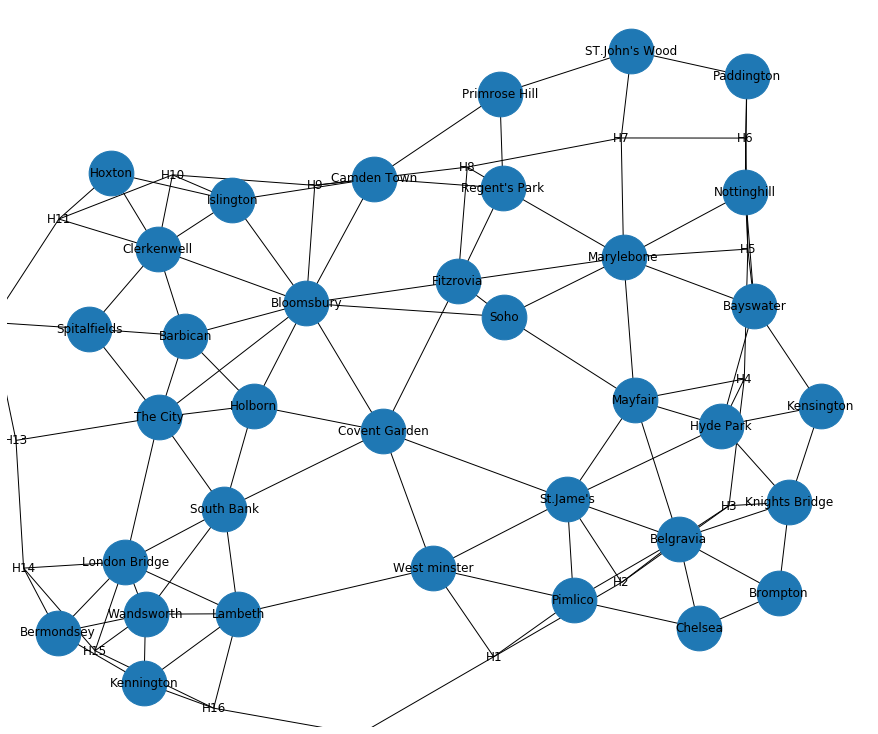

In [5]:
sim = simulation(5)
sim.show_graph()

### Now, I'm going to use the simulation above to do the analysis.

In [6]:
def plot_depot_bar(averages, orders, num):
    '''
    A function to make the plots for the depot simulation
    Inputs:
    averages: the average waiting times 
    orders: the combination that corresponds to each average waiting time
    '''
    
    if len(averages) == 5: # when we have a small number of depots, make the graph look nice by rotating the x axis ticks
        rotation = 45
    else:
        rotation = -90 
        
    # get the names of the combinations to plot them    
    regions_list = [''.join('{}: {}, '.format(key, val[0]) for key, val in i.items()) for i in orders]
    
    x = regions_list
    averages_ = [np.mean(i) for i in averages] #list that contains the average waiting time for each combination
    lowers = [np.percentile(i, [2.5 ,97.5 ])[0] for i in averages] # lower bound 95% conf interval
    uppers = [np.percentile(i, [2.5 ,97.5 ])[1] for i in averages] # upper bound 95% conf interval
    # Because I'm using errorbars to show the conf intervals, the following will make sure that the interval
    # is plotted correctly. I'm doing this because matplot errorbars subtract the mean from the errors 
    lower = np.array(lowers)*(-1)+ np.array(averages_) 
    upper = np.array(uppers) - np.array(averages_)
    errors = np.array([lower, upper])
    
    
    #plotting:
    sns.set()
    plt.subplots(1, 2, figsize = (10, 6))
    plt.subplot(1, 2, 1)
    plt.bar(x,averages_ )
    plt.xticks(rotation = rotation)
    plt.title(f"Average waiting times for different depots locations \n {num} depot case")
    plt.ylabel("Average Waiting Time")
    
    plt.subplot(1, 2, 2)
    plt.errorbar(x, averages_, yerr=errors, fmt='o', capsize=5)
    plt.xticks(rotation = rotation)
    plt.ylabel("Average Waiting Time")
    plt.title(f"Average waiting times for different depots locations with 95% conf interval \n {num} depots scenario")

    
    plt.tight_layout()
    plt.show()
    print(f"Minimum average waiting time: {x[np.argmin(averages_)]} with {round(min(averages_))} time steps")

    
    
def plot_ambul_bar(averages, orders, num):
    '''
    A function to make the plots for the ambulances. The same as the above but for ambulances.
    '''
    
    regions_list = [''.join('{}: {}, '.format(key, val[1]) for key, val in i.items()) for i in orders]

        
    
    x = regions_list
    averages_ = [np.mean(i) for i in averages]
    lowers = [np.percentile(i, [2.5 ,97.5 ])[0] for i in averages]
    uppers = [np.percentile(i, [2.5 ,97.5 ])[1] for i in averages]
    lower = np.array(lowers)*(-1)+ np.array(averages_)
    upper = np.array(uppers) - np.array(averages_)
    errors = np.array([lower, upper])
    
    sns.set()
    plt.subplots(1, 2, figsize = (10, 6))
    plt.subplot(1, 2, 1)
    plt.bar(x,averages_ )
    plt.xticks(rotation = -90)
    plt.title(f"Average waiting times for different ambulances number \n {num} total ambulances")
    plt.ylabel("Average Waiting Time")
    
    plt.subplot(1, 2, 2)
    plt.errorbar(x, averages_, yerr=errors, fmt='o', capsize=5)
    plt.xticks(rotation = -90)
    plt.ylabel("Average Waiting Time")
    plt.title(f"Average waiting times for different depots locations with 95% conf interval \n {num} depots scenario")

    
    plt.tight_layout()
    plt.show()
    
    print(f"Minimum average waiting time: {round(min(averages_))} time steps for combination: {x[np.argmin(averages_)]} ")
    

### We can start with a test simulation to see how the city works

In [7]:
# Assumging we have only one depot
verbose = True
over_regions_average = False
depots_num = 2
sim = simulation(depots_number = depots_num)
sim.depot_simulation()

Neighborhoods with ambulances: {'Primrose Hill': 1, 'Camden Town': 1} 

At time 419, emergency Case 1 happened in Primrose Hill
At time 419, an ambulance from Primrose Hill is now going for the case in Primrose Hill.The ambulance needs around 0.45 time steps
At time 420, Case 1 has successfully been transported, the ambulance is now available for new tasks
At time 421, emergency Case 2 happened in Lambeth
At time 421, an ambulance from Camden Town is now going for the case in Lambeth.The ambulance needs around 34.27 time steps
At time 439, emergency Case 3 happened in Camden Town
At time 439, an ambulance from Primrose Hill is now going for the case in Camden Town.The ambulance needs around 11.08 time steps
At time 451, Case 3 has successfully been transported, the ambulance is now available for new tasks
At time 456, Case 2 has successfully been transported, the ambulance is now available for new tasks
At time 563, emergency Case 4 happened in St.Jame's
At time 563, an ambulance from 

### Now, starting with the case if we have only 1 depot

In [24]:
verbose = False
over_regions_average = True
depots_num = 1
sim = simulation(depots_number = depots_num)
sim.depot_simulation()

working on 1 out of the 5 combinations
working on 2 out of the 5 combinations
working on 3 out of the 5 combinations
working on 4 out of the 5 combinations
working on 5 out of the 5 combinations
Done!


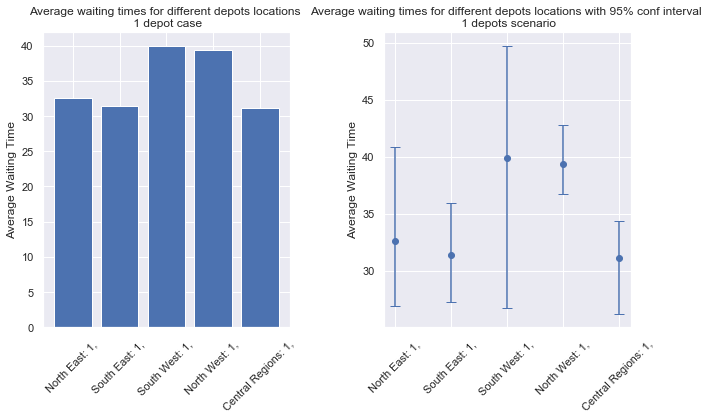

Minimum average waiting time: Central Regions: 1,  with 31.0 time steps


In [25]:
plot_depot_bar(sim.waiting_times_analysis_depot, sim.analysis_order_depot, depots_num)

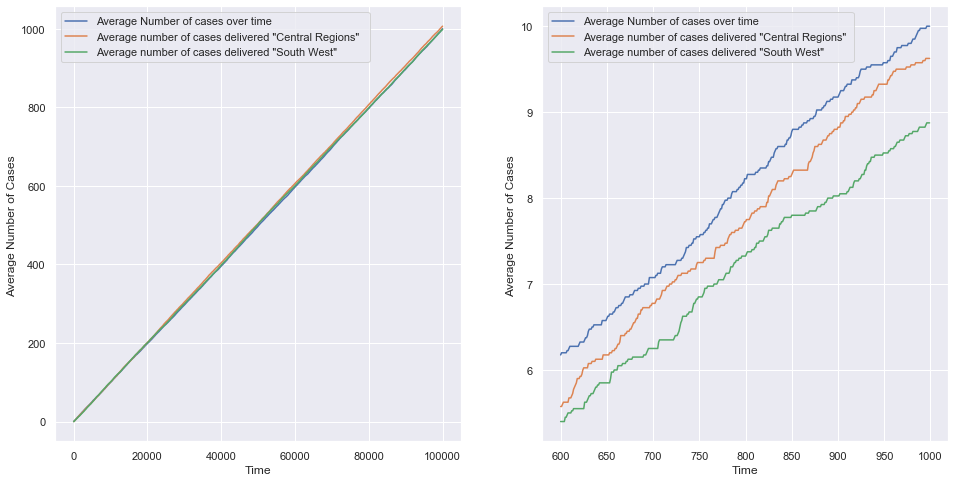

In [51]:
# Note that the indices have to be chosen manually to plot the combinations you want


plt.subplots(1, 2, figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.plot(range(1, 100001),sim.waiting_cases_num_depot[1], label = "Average Number of cases over time")
plt.plot(range(1, 100001),sim.delivered_cases_depot[south_index], label = 'Average number of cases delivered "Central Regions"  ')
plt.plot(range(1, 100001),sim.delivered_cases_depot[central_index], label = 'Average number of cases delivered "South West"  ')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Average Number of Cases ")

plt.subplot(1, 2, 2)
########################### Change the indices below using the indices from the graph above so that they correspond to
#central and t south west

plt.plot(range(600, 1000),sim.waiting_cases_num_depot[2][600:1000], label = "Average Number of cases over time")
plt.plot(range(600, 1000),sim.delivered_cases_depot[2][600:1000], label = 'Average number of cases delivered "Central Regions"')
plt.plot(range(600, 1000),sim.delivered_cases_depot[4][600:1000], label = 'Average number of cases delivered "South West"')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Average Number of Cases ")
plt.show()

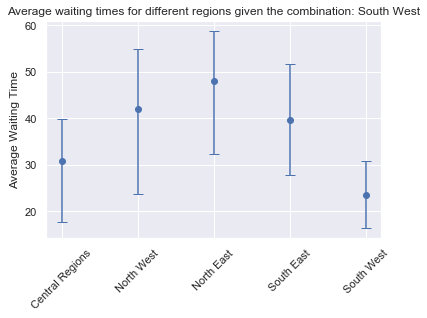

In [52]:
index = 2
x = list(sim.global_regions_averages[index].keys())
averages = list(sim.global_regions_averages[index].values())

averages_ = [np.mean(i) for i in averages] #list that contains the average waiting time for each combination
lowers = [np.percentile(i, [2.5 ,97.5 ])[0] for i in averages] # lower bound 95% conf interval
uppers = [np.percentile(i, [2.5 ,97.5 ])[1] for i in averages] # upper bound 95% conf interval
# Because I'm using errorbars to show the conf intervals, the following will make sure that the interval
# is plotted correctly. I'm doing this because matplot errorbars subtract the mean from the errors 
lower = np.array(lowers)*(-1)+ np.array(averages_) 
upper = np.array(uppers) - np.array(averages_)
errors = np.array([lower, upper])


plt.figsize = (12, 10)
plt.errorbar(x, averages_, yerr=errors, fmt='o', capsize=5)
plt.xticks(rotation = 45)
plt.ylabel("Average Waiting Time")
plt.title(f"Average waiting times for different regions given the combination: {list(sim.analysis_order_depot[index].keys())[0]}")



plt.show()




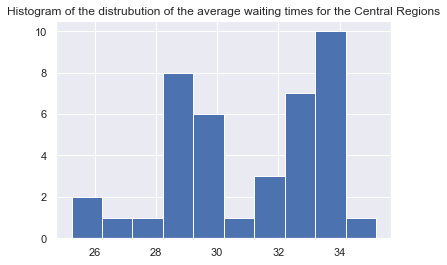

In [12]:
central_index = [list(i.keys())[0] for i in sim.analysis_order_depot].index("Central Regions")
plt.hist(sim.waiting_times_analysis_depot[central_index])
plt.title("Histogram of the distrubution of the average waiting times for the Central Regions")
plt.show()

### Now the case with 2 depots.

In [13]:
verbose = False
over_regions_average = False
depots_num = 2
sim = simulation(depots_number = depots_num)
sim.depot_simulation()

working on 1 out of the 15 combinations
working on 2 out of the 15 combinations
working on 3 out of the 15 combinations
working on 4 out of the 15 combinations
working on 5 out of the 15 combinations
working on 6 out of the 15 combinations
working on 7 out of the 15 combinations
working on 8 out of the 15 combinations
working on 9 out of the 15 combinations
working on 10 out of the 15 combinations
working on 11 out of the 15 combinations
working on 12 out of the 15 combinations
working on 13 out of the 15 combinations
working on 14 out of the 15 combinations
working on 15 out of the 15 combinations
Done!


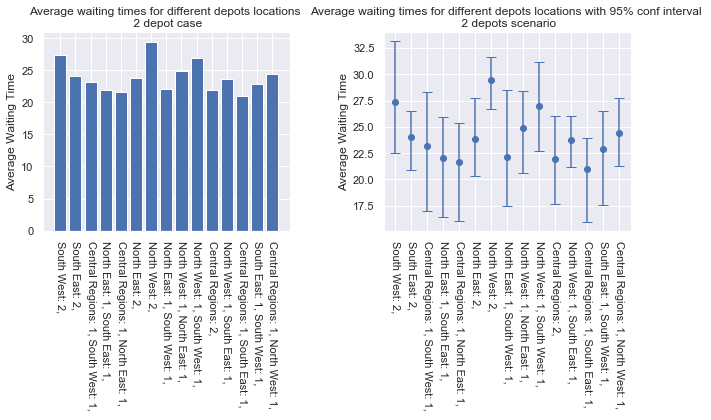

Minimum average waiting time: Central Regions: 1, South East: 1,  with 21.0 time steps


In [14]:
plot_depot_bar(sim.waiting_times_analysis_depot, sim.analysis_order_depot, depots_num)

### Once we know the optimal allocation for depots, we get the optimal allocation for ambulances. Assuming we have 5 ambulances only.

In [15]:
#best_depot_combination = sim.analysis_order_depot[np.argmin([np.mean(i) for i in sim.waiting_times_analysis_depot])]
best_depot_combination = {'Central Regions': [1, 1], 'South East': [1, 1]}


In [16]:
verbose = False
sim = simulation(depots_number = depots_num)
sim.ambulance_simulation(regions_dict = best_depot_combination, ambulances_number=5)

working on 1 out of the 4 combinations
working on 2 out of the 4 combinations
working on 3 out of the 4 combinations
working on 4 out of the 4 combinations
Done!


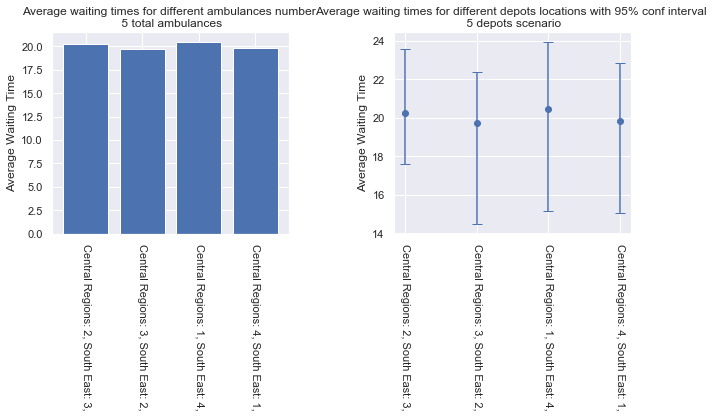

Minimum average waiting time: 20.0 time steps for combination: Central Regions: 3, South East: 2,  


In [17]:
plot_ambul_bar(sim.waiting_times_analysis_ambulance, sim.analysis_order_ambulance, 5)

### Now thr case with 3 depots.

In [18]:
verbose = False
depots_num = 3
sim = simulation(depots_number = depots_num)
sim.depot_simulation()

working on 1 out of the 35 combinations
working on 2 out of the 35 combinations
working on 3 out of the 35 combinations
working on 4 out of the 35 combinations
working on 5 out of the 35 combinations
working on 6 out of the 35 combinations
working on 7 out of the 35 combinations
working on 8 out of the 35 combinations
working on 9 out of the 35 combinations
working on 10 out of the 35 combinations
working on 11 out of the 35 combinations
working on 12 out of the 35 combinations
working on 13 out of the 35 combinations
working on 14 out of the 35 combinations
working on 15 out of the 35 combinations
working on 16 out of the 35 combinations
working on 17 out of the 35 combinations
working on 18 out of the 35 combinations
working on 19 out of the 35 combinations
working on 20 out of the 35 combinations
working on 21 out of the 35 combinations
working on 22 out of the 35 combinations
working on 23 out of the 35 combinations
working on 24 out of the 35 combinations
working on 25 out of the 

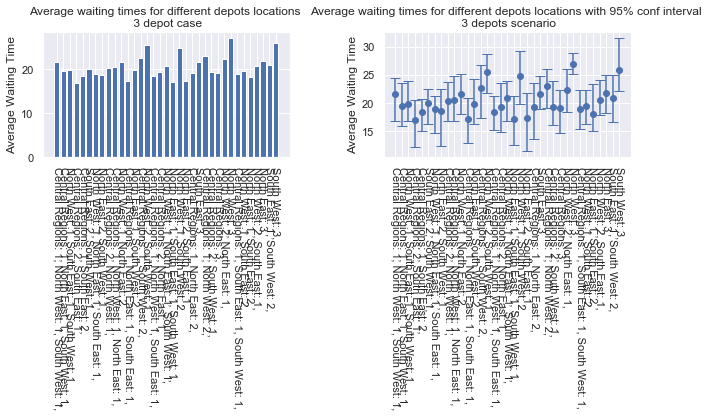

Minimum average waiting time: Central Regions: 2, South East: 1,  with 17.0 time steps


In [19]:
plot_depot_bar(sim.waiting_times_analysis_depot, sim.analysis_order_depot, depots_num)

### Once we know the optimal allocation for depots, we get the optimal allocation for ambulances. Assuming we have 5 ambulances only.

In [20]:
best_depot_combination = sim.analysis_order_depot[np.argmin([np.mean(i) for i in sim.waiting_times_analysis_depot])]
best_depot_combination


{'Central Regions': [2, 1], 'South East': [1, 1]}

In [21]:
verbose = False
sim = simulation(depots_number = depots_num)
sim.ambulance_simulation(regions_dict = best_depot_combination, ambulances_number=5)

working on 1 out of the 4 combinations
working on 2 out of the 4 combinations
working on 3 out of the 4 combinations
working on 4 out of the 4 combinations
Done!


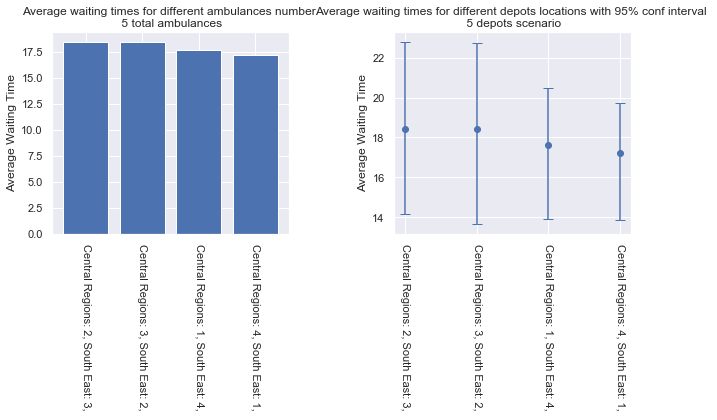

Minimum average waiting time: 17.0 time steps for combination: Central Regions: 4, South East: 1,  


In [22]:
plot_ambul_bar(sim.waiting_times_analysis_ambulance, sim.analysis_order_ambulance, 5)